# Lotto Number Predictions

This notebook performs a download of the most recent winning numbers from the Lotto649 (a lottery managed by the **British Columbia Lotto Corporation** in BC, Canada), and performs basic number analysis on them in order to describe the most winningest numbers in history.



## Resources

In [6]:
# Main Getter Function

import sys
import pandas as pd
import urllib.request
import zipfile

# Download 
def dl_file(url, data_path, file_name):
    print("### Downloading " + url + " and saving as " + data_path + file_name)
    urllib.request.urlretrieve(url, data_path + file_name)
    
    
# Unzip
def unzip(data_path, file_name):
  print("### Unzipping " + file_name + " at " + data_path)
  extension = ".zip"

  zip_ref = zipfile.ZipFile(data_path + file_name + extension, 'r')
  zip_ref.extractall(data_path)
  zip_ref.close()

# Variables - TODO - make abstract to handle other sets
url = "http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip"
data_path = "data/"
file_name = "649"

# download zip file and save
dl_file(url, data_path, file_name)

# unzip to csv
unzip(data_path, file_name)


### Downloading http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip and saving as data/649
### Unzipping 649 at data/


## Conversion

In [10]:
import csv
import pandas as pd


def read_csv(data_path, file_name):
    extension = ".csv"
    path = data_path + file_name + extension
    print("### Reading " + path)
    index = 0

    with open(path, newline='') as f:
        #reader = csv.reader(f, delimiter=',')
        reader = pd.read_csv(path)
        reader.set_index("DRAW NUMBER", inplace=True)
        for row in reader:
            print(', '.join(row))
            index += 1

        row_count = sum(1 for row in reader)
        print("Read " + str(index) + " lines")
        return reader


In [36]:
base_reader = pd.read_csv(data_path + file_name + ".csv")
base_reader.set_index("DRAW NUMBER", inplace=True)
base_reader.head()

,PRODUCT,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
DRAW NUMBER,,,,,,,,,,
1,649,0,1982-06-12,3,11,12,14,41,43,13
2,649,0,1982-06-19,8,33,36,37,39,41,9
3,649,0,1982-06-26,1,6,23,24,27,39,34
4,649,0,1982-07-03,3,9,10,13,20,43,34
5,649,0,1982-07-10,5,14,21,31,34,47,45


In [88]:
draws = base_reader[["NUMBER DRAWN 1","NUMBER DRAWN 2","NUMBER DRAWN 3","NUMBER DRAWN 4","NUMBER DRAWN 5","NUMBER DRAWN 6"]]
draws.head()


,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
DRAW NUMBER,,,,,,
1,3,11,12,14,41,43
2,8,33,36,37,39,41
3,1,6,23,24,27,39
4,3,9,10,13,20,43
5,5,14,21,31,34,47


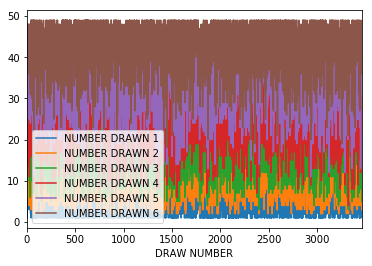

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

draws.plot()
plt.show()

## Analysis

In [39]:
draw_one = draws[["NUMBER DRAWN 1"]]
draw_one.head()

,NUMBER DRAWN 1
DRAW NUMBER,
1,3
2,8
3,1
4,3
5,5


In [35]:
# one way
(draw_one == 16).sum()

NUMBER DRAWN 1    64
dtype: int64

In [38]:
# another way
draw_one[draw_one == 16].count()

NUMBER DRAWN 1    64
dtype: int64

In [49]:
# store min
min = draw_one.min()
min

NUMBER DRAWN 1    1
dtype: int64

In [54]:
# store max
max = draw_one.max()
max

NUMBER DRAWN 1    38
dtype: int64

In [77]:
dovc = draw_one['NUMBER DRAWN 1'].value_counts()
dovc.columns = ["value"]
dovc

1     414
2     382
4     337
3     335
5     254
6     226
7     223
9     183
8     182
10    145
11    138
12    119
13     99
14     70
15     65
16     64
17     52
18     44
20     41
19     39
21     26
23     26
22     16
24     12
26     10
27      9
28      6
25      5
30      4
29      4
31      2
33      1
32      1
38      1
Name: NUMBER DRAWN 1, dtype: int64

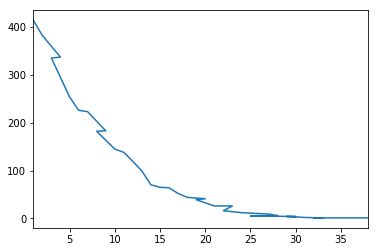

In [68]:
dovc.plot()

In [82]:
dom = dovc.to_frame()
dom.columns = ["value"]

max_one = dom.iloc[0]
max_one


value    414
Name: 1, dtype: int64

## Max Numbers

In [115]:
for index, column in enumerate(draws.columns):
    df = reader2[column].value_counts().to_frame()
    df.columns = ["value"]
    val = df.iloc[0]
    print("Most drawn number for " + str(val) + " is the number " + str(val.name) + " at " + str(val.value) + " times.")

Most drawn number for value    414
Name: 1, dtype: int64 is the number 1 at 414 times.
Most drawn number for value    187
Name: 12, dtype: int64 is the number 12 at 187 times.
Most drawn number for value    172
Name: 22, dtype: int64 is the number 22 at 172 times.
Most drawn number for value    192
Name: 31, dtype: int64 is the number 31 at 192 times.
Most drawn number for value    204
Name: 38, dtype: int64 is the number 38 at 204 times.
Most drawn number for value    428
Name: 49, dtype: int64 is the number 49 at 428 times.
